In [1]:
import dwong
electron = "/Users/wongdowling/Desktop/n-tuples/5_80_training/electron_520_p580.root"

In [17]:
dq_events = dwong.getData(electron, "Events")
dq_st23 = dq_events["st23"]
(x, y, eng, labels, labels_decrease, seeds, seed_labels) = dwong.multi_clusters(dq_events)#here performed clustering
trkls_coord = dwong.np.stack((dq_st23["x"], dq_st23["y"], dq_st23["z"], dq_st23["px"], dq_st23["py"], dq_st23["pz"]), axis=1)
dist=[]
for i in range(len(eng)):
    label=seed_labels[i][0]
    seed=seeds[i][label]
    if(len(trkls_coord[i][0]))==1:
        trkl = trkls_coord[i]  # Assuming the tracklet data is in the first row

        # Calculate the absolute difference in x and y coordinates separately
        dist_x = abs(seed[0] - trkl[0][0])  # Assuming the first element is x
        dist_y = abs(seed[1] - trkl[1][0])  # Assuming the second element is y

        dist.append((dist_x, dist_y))
        

In [18]:
len(dist)

9247

In [19]:
dist[0]

(5.053459148406972, 0.7466291427612219)

In [20]:
n=0
for item in trkls_coord:
    if len(item[0])==0:
        n+=1
print(n)

337


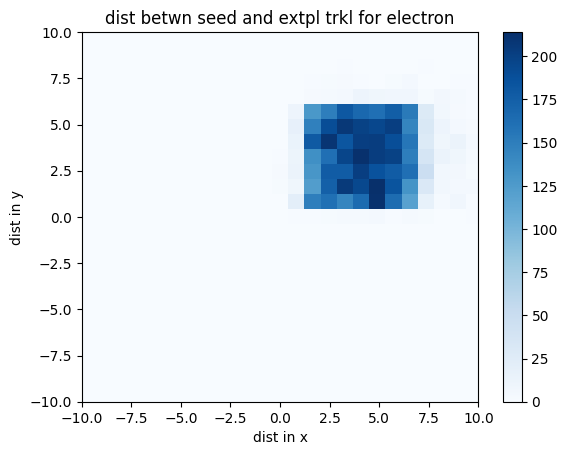

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: replace this with your array of events
events = np.array(dist)

# Extracting x and y coordinates
x_coords = events[:, 0]
y_coords = events[:, 1]

plt.hist2d(x_coords, y_coords, bins=[np.linspace(-20, 20, 50), np.linspace(-20, 20, 50)], cmap='Blues')
plt.colorbar()  # To show the color scale

# Set x and y axis limits
plt.xlim(-20, 20)
plt.ylim(-20, 20)
# Adding titles and labels (optional)
plt.title('dist betwn seed and extpl trkl for electron')
plt.xlabel('dist in x')
plt.ylabel('dist in y')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.savefig('2DHist_electron')

# Display the histogram
plt.show()


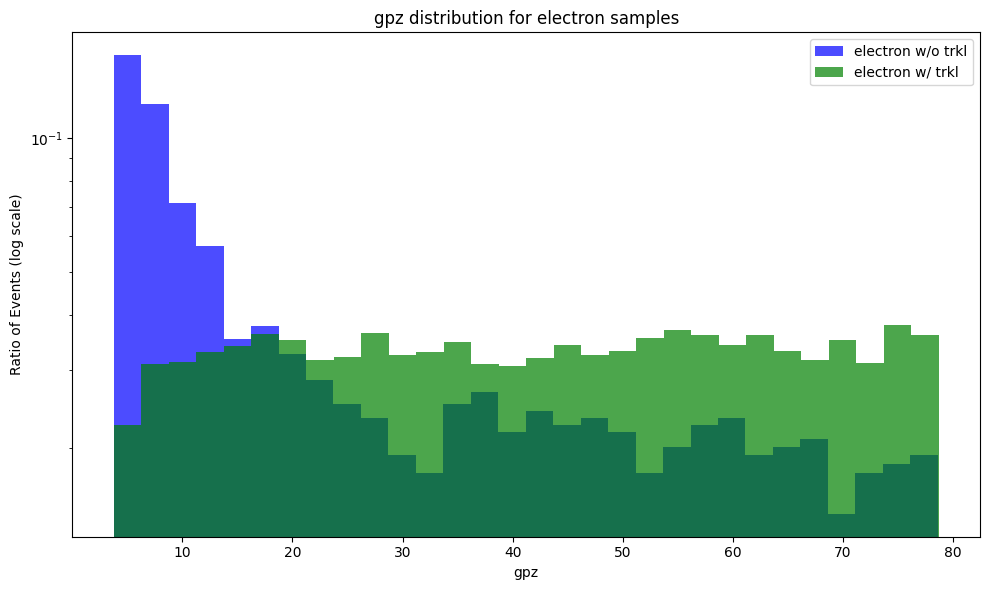

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming the file path provided is accessible in the current environment, let's read the CSV file
file =  '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_electron_0_10000.csv'

# Read the CSV file
data = pd.read_csv(file)

# Filter the data into two categories: events with trkl_x = -9999 and events with trkl_x != -9999
bins = 30

plt.figure(figsize=(10, 6))

# Histogram for events with trkl_x = -9999
counts_negative, edges_negative = np.histogram(data_negative['gpz'], bins=bins)
plt.bar(edges_negative[:-1], counts_negative / counts_negative.sum(), width=np.diff(edges_negative), 
        color='blue', alpha=0.7, label='electron w/o trkl')

# Histogram for events with trkl_x != -9999
counts_positive, edges_positive = np.histogram(data_positive['gpz'], bins=bins)
plt.bar(edges_positive[:-1], counts_positive / counts_positive.sum(), width=np.diff(edges_positive), 
        color='green', alpha=0.7, label='electron w/ trkl')

plt.yscale('log')
plt.title('gpz distribution for electron samples')
plt.xlabel('gpz')
plt.ylabel('Ratio of Events (log scale)')
plt.legend()

plt.tight_layout()
plt.savefig("gpz_distribution.png")
plt.show()


